In [54]:
# Load libraries
from sklearn import datasets
import pandas as pd
# Load digits dataset
#iris = datasets.load_iris()

In [64]:
df=pd.read_csv("iris.csv")

In [5]:
#import scipy.stats as stats
#stats.f_oneway(df.iloc[:,0], df.iloc[:,1],df.iloc[:,2])

F_onewayResult(statistic=236.75163298404746, pvalue=7.657188374182084e-71)

In [65]:
df=df.rename(columns={'sepal.length':'s_length','sepal.width':'s_width','petal.length':'p_length','petal.width':'p_width'})

In [66]:
df.columns

Index(['s_length', 's_width', 'p_length', 'p_width', 'variety'], dtype='object')

# ANOVA TEST

In [86]:
#ANOVA Test
import scipy.stats as stats
fvalue, pvalue=stats.f_oneway(df.iloc[:,0],df.iloc[:,2])
print(fvalue, pvalue)

171.5668541670246 2.857104069581967e-31


In [72]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [91]:
# Ordinary Least Squares (OLS) model
model = ols('df.s_length ~ df.p_length', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
df.p_length,1.0,77.643300,77.64330,468.550154,1.038667e-47
Residual,148.0,24.525034,0.16571,NaN,NaN


# CHI Square Test

In [93]:
#CHI-SQUARE TEST
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [94]:
df = pd.DataFrame({'Gender' : ['M', 'M', 'M', 'F', 'F'] * 10,
                   'isSmoker' : ['Smoker', 'Smoker', 'Non-Smpoker', 'Non-Smpoker', 'Smoker'] * 10
                  })

In [26]:
df

,Gender,isSmoker
0,M,Smoker
1,M,Smoker
2,M,Non-Smpoker
3,F,Non-Smpoker
4,F,Smoker
5,M,Smoker
6,M,Smoker
7,M,Non-Smpoker
8,F,Non-Smpoker
9,F,Smoker


In [27]:
df.head()

,Gender,isSmoker
0,M,Smoker
1,M,Smoker
2,M,Non-Smpoker
3,F,Non-Smpoker
4,F,Smoker


In [96]:
# Contingency Table
contigency= pd.crosstab(df['Gender'], df['isSmoker'])
contigency

isSmoker,Non-Smpoker,Smoker
Gender,,
F,10,10
M,10,20


In [29]:
#Let’s say that we want to get the percentages by Gender (row)
contigency_pct = pd.crosstab(df['Gender'], df['isSmoker'], normalize='index')
contigency_pct

isSmoker,Non-Smpoker,Smoker
Gender,,
F,0.500000,0.500000
M,0.333333,0.666667


<AxesSubplot:xlabel='isSmoker', ylabel='Gender'>

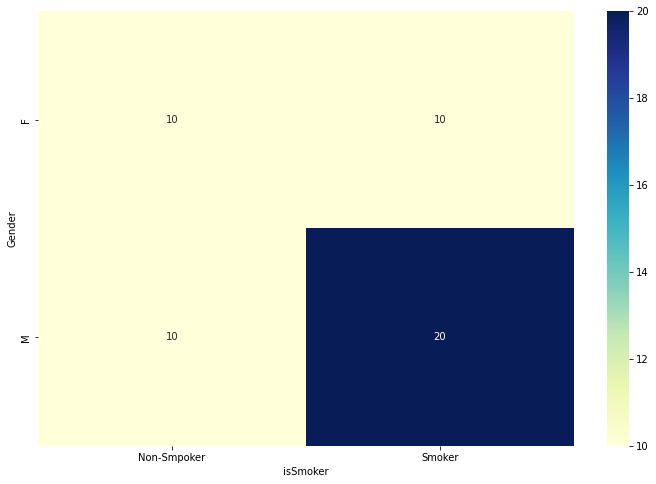

In [33]:
#Heatmaps
#An easy way to see visually the contingency tables are the heatmaps.
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [97]:
#Chi-Square Test
#Now that we have built the contingency table we can pass it to chi2_contingency function from the scipy package which returns the:

#chi2: The test statistic
#p: The p-value of the test
#dof: Degrees of freedom
#expected: The expected frequencies, based on the marginal sums of the table
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)
print(c, p, dof, expected)

0.78125 0.3767591178115821 1 [[ 8. 12.]
 [12. 18.]]


In [98]:
#or
c, p, dof, expected = chi2_contingency(pd.crosstab(df['Gender'], df['isSmoker']))
print(c, p, dof, expected)

0.78125 0.3767591178115821 1 [[ 8. 12.]
 [12. 18.]]
